In [10]:
"""
An implementation for HW2.
This is source code for logistic regression for optimal performance.
This uses Logistic regression method with cross entrophy with GD for optimization.
By 32190984 Isu Kim  @ github.com/gooday2die
"""

'\nAn implementation for HW2.\nThis is source code for logistic regression for optimal performance.\nThis uses Logistic regression method with cross entrophy with GD for optimization.\nBy 32190984 Isu Kim  @ github.com/gooday2die\n'

In [11]:
import pandas as pd
import numpy as np

In [12]:
def sigmoid(x):
    """
    A function that implements sigmoid function.
    This will calculate sigmoid function with value of x.
    
    @param x: The x value to calculate sigmoid function.
    @return: The calculated value in float.
    """
    return 1 / (1 + np.exp(-x))

In [13]:
def equation(x, theta):
    return theta[0] * x[0] + theta[1] * (x[1] ** 3) + theta[2] * ((x[1] ** 2) * x[2]) + theta[3] * (x[1] * (x[2] ** 2)) + theta[4] * (x[2] ** 3)

In [14]:
def hypothesis(x, theta):
    """
    A function that is for hypothesis which is our model h_\theta(x)
    This will calculate sigmoid function with linear function as exponent.
    
    Both parameters must be in 1D flattened list object.
    @param x: The list object containing pair of [x_1 and x_2]
    @param theta: The list object containing tuple of [\theta_0, \theta_1, \theta_2]
    @return: The calculated value.    
    """
    return sigmoid(equation(x, theta))

In [15]:
def get_gradient(x, y, theta, j):
    """
    A function that is for calculating gradient of specific j.

    @param x: All data containing x values. 
              This shall be in N * 3 dimension.
    @param y: All data containing y values.
              This shall be in N * 1 dimension.
    @param theta: All theta values.
              This shall be in N * 1 dimension.
    @param j: The specific j to get gradient from.
              For example, if we are about to update \theta_1, use j as 1.
              This function will calculate gradient of the cost graph with j = 1.
    @return: The calculate gradient value for specific j.
    """
    tmp = 0
    for i in range(len(x)):
        predict = hypothesis(x[i], theta)
        mul = 0
        if (j == 0):
            mul = 1
        elif (j == 1):
            mul = x[i][1] ** 3
        elif (j == 2):
            mul = (x[i][1] ** 2) * (x[i][2] ** 1)
        elif (j == 3):
            mul = (x[i][1] ** 2) * (x[i][2] ** 1)
        elif (j == 4):
            mul = x[i][2] ** 3
        tmp = tmp + (predict - y[i]) * mul
    return tmp / len(x)

In [16]:
def do_gradient_descent(max_iter, learning_rate, data_x, data_y, round_point):
    """
    A function that does gradient descent.
    This will use logistic regression with cost using cross entropy.
    
    Please refer to documentation for more information about implementation.
    
    @param max_iter: The maximum iteration count for training. Use iterations like 1000000.
    @param learning_rate: The learning rate for gradient descent.
                          Use learning rate which is not too small, don't use values like 0.01.
                          That will take so much time.
    @param data_x: The x data.
    @param data_y: The y data.
    @param round_point: The point that the weights are rounded.
                        If not rounded, this might go up to lots of iterations.
    @return list object that contains (a, b)
    """
    theta = [0] * 5  # Intial value for \thetas.
    x = [(1, data_x["x1"][i], data_x["x2"][i]) for i in range(len(data_x))]  # Store 1, x_1, x_2)
    y = list(data_y)
    
    before_theta = list()
    
    for i in range(max_iter):  # Iterate for max_iter count
        if i % 100 == 0:  # In every 1000 iterations, print \theta. just for outputs.
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))

        before_theta = theta
        tmp_theta = [0] * 5  # Store tmp \theta values.
    
        for j in range(5):  # Update \theta_0 to \theta_3
            gradient = get_gradient(x, y, theta, j)  # Calculate gradient
            tmp_theta[j] = theta[j] - learning_rate * gradient  # Apply GD.

        theta = tmp_theta  # Update \thetas simultaneously.        

        # Check if convergence happened. If so, stop training.
        if ([round(x, round_point) for x in before_theta] == [round(x, round_point) for x in theta]):
        #if before_theta == theta:
            print("Convergence!!! Stop training.")
            print("[+] Iter : " + str(i) + " / Theta : " + str(theta))
            break
        
    return theta

In [17]:
def predict(x, theta):
    """
    A function that predicts data using theta value
    @param x: The x value in [X_0, X_1, X_2] format.
    @param theta: The theta values to use.
    @return: Predicted label
    """
    if equation(x, theta) >= 0:
        return 1
    else:
        return 0

In [18]:
def calculate_accr(x_in, y_in, theta):
    """
    A function that calculates accuracy with \theta
    The accuracy is calculated by
    (total correct predictions) / (data count)
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Accuracy.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.

    correct = 0
    for i in range(len(x)):  # Iterate and check if predict matches real data.
        predicted = predict(x[i], theta)
        if predicted == y[i]:
            correct += 1  # If so, add one to correct.
    print("[+] " + str(correct) + "/" + str(len(x)))
    return correct / len(x)  # Divide all corrects by all data.

In [19]:
def calculate_cost(x_in, y_in, theta):
    """
    A function that calculates cost of with \theta.
    The cost is calculated by
    
    -1/m sum i from 1 to m (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i)))
    
    @param x_in: The x value in [X_1, X_2] format
    @param y_in: The y values
    @param theta: The theta values in [theta_0, theta_1, theta_2] format
    @return Cost.
    """
    x = [(1, x_in["x1"][i], x_in["x2"][i]) for i in range(len(y_in))]  # Store (1, x_1, x_2)
    y = list(y_in)  # Store y values.
    
    total = 0
    for i in range(len(y)):
        # Iterate and calculate (y_i * ln(h_\theta(x_i)) + (1 - y_i) * ln(1 - h_\theta(x_i))
        total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
    
    return -1 * total / len(y)

In [30]:
df_train = pd.read_csv("../hw2_train.csv")  # Read csv file.
data_x = df_train[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_train["y"]  # Select y col from data

In [22]:
# This is for Task 1. from homework 2.
# This will train data using hw2_train.csv and store theta values into result.
# Please be aware that this will take lots of time to converge and exit.
# If you cannot wait this convergence, there are two options
#
# 1. Use low rounding points: 
#    This will make our model if some digits match for some digits, it will consider it convergence.
result = do_gradient_descent(1000000, 0.1, data_x, data_y, 5) 

[+] Iter : 0 / Theta : [0, 0, 0, 0, 0]
[+] Iter : 100 / Theta : [6.686495255955112e-01, -1.0770031605418773, -0.21063548347235964, -0.21063548347235964, -0.12307998248370852]
[+] Iter : 200 / Theta : [9.828086933249419e-01, -1.3355838013891974, -0.27159158840713027, -0.27159158840713027, -0.14366517816175522]
[+] Iter : 300 / Theta : [1.1643027062248874e+00, -1.5014953404057605, -0.32518555174672986, -0.32518555174672986, -0.15763194304176523]
[+] Iter : 400 / Theta : [1.2811810784851954e+00, -1.6214915410333015, -0.37332242140373456, -0.37332242140373456, -0.16793275159094484]
[+] Iter : 500 / Theta : [1.3620041958031832e+00, -1.712837077658845, -0.4171561682639687, -0.4171561682639687, -0.17610637753204533]
[+] Iter : 600 / Theta : [1.420887422892432e+00, -1.7842884925366593, -0.4575020646657736, -0.4575020646657736, -0.18296424380959173]
[+] Iter : 700 / Theta : [1.4655564440224302e+00, -1.8410815419328659, -0.49495739909659825, -0.49495739909659825, -0.18895200459810865]
[+] Iter :

[+] Iter : 6200 / Theta : [1.7392190475133777e+00, -2.0156507761900073, -1.251159297586878, -1.251159297586878, -0.29701000420031326]
[+] Iter : 6300 / Theta : [1.739848912503123e+00, -2.0151219264117706, -1.2556226714048822, -1.2556226714048822, -0.29767342311332134]
[+] Iter : 6400 / Theta : [1.74046034330391e+00, -2.0146191457940406, -1.2599519593272948, -1.2599519593272948, -0.29831774657909976]
[+] Iter : 6500 / Theta : [1.7410539975238921e+00, -2.0141410627039233, -1.264151768752468, -1.264151768752468, -0.29894358497773915]
[+] Iter : 6600 / Theta : [1.741630496694708e+00, -2.0136863701968832, -1.2682265189839717, -1.2682265189839717, -0.29955152590200657]
[+] Iter : 6700 / Theta : [1.7421904295383142e+00, -2.0132538249843472, -1.2721804501436744, -1.2721804501436744, -0.3001421351803171]
[+] Iter : 6800 / Theta : [1.7427343548480456e+00, -2.0128422460048045, -1.2760176316420446, -1.2760176316420446, -0.3007159578449238]
[+] Iter : 6900 / Theta : [1.743262804032793e+00, -2.01245

In [32]:
result = [1.7569448834471597e+00, -2.0049664463859713, -1.3747949223559732, -1.3747949223559732, -0.3156989588444056]

In [33]:
print("[+] Train data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by train data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by train data.
print("[+] Accuracy : " + str(accr))

[+] Train data
[+] Cost : nan
[+] 1424/1500
[+] Accuracy : 0.9493333333333334


/tmp/ipykernel_213391/1813824639.py:19: RuntimeWarning: divide by zero encountered in log
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
/tmp/ipykernel_213391/1813824639.py:19: RuntimeWarning: invalid value encountered in double_scalars
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))


In [34]:
# This is for Task 2. from homework 2.
# This will load hw2_test.csv and validate cost and accuracy.
df_test = pd.read_csv("../hw2_test.csv")  # Read csv file.
data_x = df_test[["x1", "x2"]]  # Select x1 and x2 col from data
data_y = df_test["y"]  # Select y col from data

In [37]:
print("[+] Test data")
cost = calculate_cost(data_x, data_y, result)  # Calculate cost of trained model by test data.
print("[+] Cost : " + str(cost))
accr = calculate_accr(data_x, data_y, result)  # Accuracy of trained model by test data.
print("[+] Accuracy : " + str(accr))

[+] Test data
[+] Cost : nan
[+] 477/500
[+] Accuracy : 0.954


/tmp/ipykernel_213391/1813824639.py:19: RuntimeWarning: divide by zero encountered in log
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))
/tmp/ipykernel_213391/1813824639.py:19: RuntimeWarning: invalid value encountered in double_scalars
  total += ((y[i] * np.log(hypothesis(x[i], theta))) + (1 - y[i]) * np.log(1 - hypothesis(x[i], theta)))


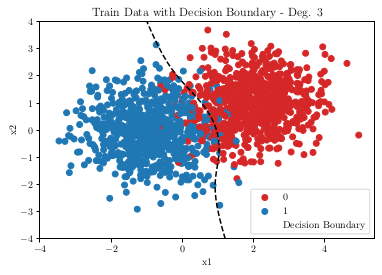

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
df_train = pd.read_csv("../hw2_train.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Train Data with Decision Boundary - Deg. 3")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -4:4:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 3) + result[2] * (x ** 2) * y + result[3] * x * (y ** 2) + result[4] * (y ** 3), [-result[0]], colors="black")

cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg3-train.pgf')

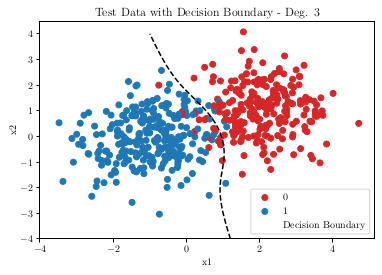

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
fig, ax = plt.subplots()

matplotlib.use("pgf")  # For storing graph into pgf for latex.
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
df_train = pd.read_csv("../hw2_test.csv")
colors = ['tab:red' if tmp == 0 else 'tab:blue' for tmp in df_train.y]  # Set colors according to it's lables.

plt.title("Test Data with Decision Boundary - Deg. 3")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(df_train.x1[0], df_train.x2[0], c="tab:red", label="0")  # Those two scatters are for legends.
plt.scatter(df_train.x1[1], df_train.x2[1], c="tab:blue", label="1")
plt.scatter(df_train.x1[1:], df_train.x2[1:], c=colors[1:])

y, x = np.ogrid[-4:4:1000j, -4:4:1000j]
cs = plt.contour(
    x.ravel(), y.ravel(), result[1] * (x ** 3) + result[2] * (x ** 2) * y + result[3] * x * (y ** 2) + result[4] * (y ** 3), [-result[0]], colors="black")

cs.collections[0].set_label("Decision Boundary")

plt.legend()
plt.show()
plt.savefig('deg3-test.pgf')